# HOMEWORK 2: Momentum Accelerated and Normalized GD, Hessians and Linear Regression 

### Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

import autograd.numpy as np
from autograd import grad, value_and_grad

## Exercise 1 – Momentum Accelerated GD

### 1.1 – Momentum Accelerated GD Algorithm 

In [1]:
def mom_acc_GD(g,alpha_choice,max_its,w,beta):
    ''' 

    Since the negative gradient direction always points perpindicular to the contours of a function, the gradient direction oscillates rapidly which slows minimization.
    Momentum Accelerated GD defined as mom_acc_GD is a first-order local optimization function that solves the zigzagging issue of GD. 
    The algorithm will smoothen out the step as they are created by exponentially averaging the descent directions.
    We will use a parameter "beta" with the ideal range [0.7,1] in our exponential averaging calculation.  

    Parameters
    -------------

    g : callable 
    input function

    alpha_choice : int or str
    steplength parameter/learning rate

    max_its : int
    maximum number of iterations

    w : array 
    initialization

    beta : int
    exponential average parameter


    Return
    -------------

    weight_history : list
    contains all the weights in the algorithm including the initial

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    # compute gradient module using autograd
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
        
        # perform exponential averaging on descent directions when k>1
        cost_eval,grad_eval = gradient(w)
        if k == 1:
            desc_dir = -grad_eval # descent direction is equal to the negative gradient 
        else:
            desc_dir = (beta*desc_dir) + ((1 - beta)*(-grad_eval)) # exponentially average descent direction 

        # take gradient descent step
        w = w + alpha*desc_dir

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

### 1.2 – Implementation of Momentum Accelerated GD

In [3]:
# Run 1

# Set the parameters for our algorithm 
C = np.array([[0.5,0],[0,9.75]])
g = lambda w: (np.dot(np.dot(w.T,C),w))
alpha_choice = 0.1; w = np.array([10,1]); max_its = 25; beta = 0

# Run our algorithm with the defined function to obtain w and cost history
weight_history_r1,cost_history_r1 = mom_acc_GD(g,alpha_choice,max_its,w,beta)

In [4]:
# Run 2

# Set the parameters for our algorithm 
C = np.array([[0.5,0],[0,9.75]])
g = lambda w: (np.dot(np.dot(w.T,C),w))
alpha_choice = 0.1; w = np.array([10,1]); max_its = 25; beta = 0.1

# Run our algorithm with the defined function to obtain w and cost history
weight_history_r2,cost_history_r2 = mom_acc_GD(g,alpha_choice,max_its,w,beta)

In [5]:
# Run 3

# Set the parameters for our algorithm 
C = np.array([[0.5,0],[0,9.75]])
g = lambda w: (np.dot(np.dot(w.T,C),w))
alpha_choice = 0.1; w = np.array([10,1]); max_its = 25; beta = 0.7

# Run our algorithm with the defined function to obtain w and cost history
weight_history_r3,cost_history_r3 = mom_acc_GD(g,alpha_choice,max_its,w,beta)
print(weight_history_r3[-1])

[ 0.14239139 -0.02725141]


#### Contour Plot of g($\omega$) with weight_history overlay

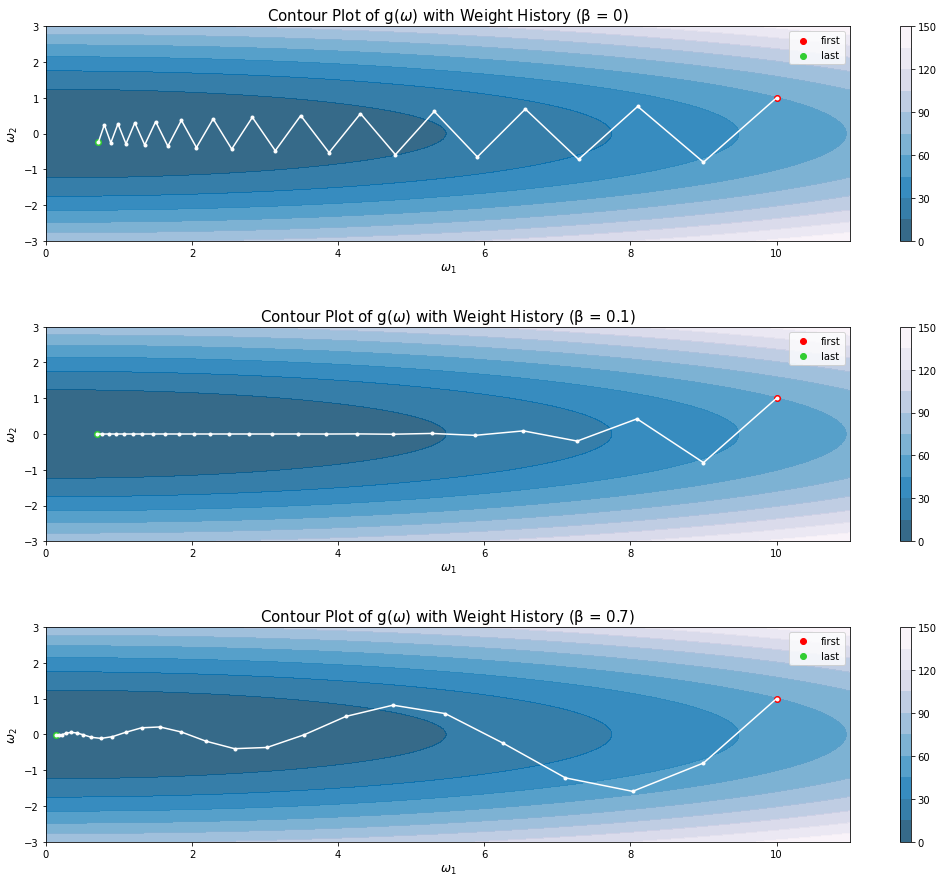

In [6]:
# Introduce our data
def g(x,y):
    return (0.5*x**2 + 9.75*y**2) # Solved g(w) with given C matrix for contour plot
x1 = np.linspace(0,11,100)
y1 = np.linspace(-3,3,100)
x2,y2 = np.meshgrid(x1,y1)
z = g(x2,y2)

# Create arrays for w history 
weight_history_array_r1 = np.array(weight_history_r1) 
weight_history_array_r2 = np.array(weight_history_r2)
weight_history_array_r3 = np.array(weight_history_r3) 

# Create separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 15))
plt.subplots_adjust(hspace = 0.4)

# Run 1
v = ax1.contourf(x2,y2,z,10, cmap=cm.PuBu_r, alpha = 0.8)
ax1.set_title("Contour Plot of g($\omega$) with Weight History (\u03B2 = 0)", fontsize = 15) 
ax1.set_xlabel('$\omega_1$', fontsize = 12) 
ax1.set_ylabel('$\omega_2$', fontsize = 12)
ax1.plot(weight_history_array_r1[:,:1],weight_history_array_r1[:,1:], color = 'white', marker = '.')
ax1.scatter(weight_history_array_r1[0][0], weight_history_array_r1[0][1], color = 'red', marker = 'o', label = 'first')
ax1.scatter(weight_history_array_r1[-1][0], weight_history_array_r1[-1][1], color = 'limegreen', marker = 'o', label = 'last')
ax1.legend()
plt.colorbar(v,ax=ax1)

# Run 2
q = ax2.contourf(x2,y2,z,10, cmap=cm.PuBu_r, alpha = 0.8)
ax2.set_title("Contour Plot of g($\omega$) with Weight History (\u03B2 = 0.1)", fontsize = 15) 
ax2.set_xlabel('$\omega_1$', fontsize = 12) 
ax2.set_ylabel('$\omega_2$', fontsize = 12)
ax2.plot(weight_history_array_r2[:,:1],weight_history_array_r2[:,1:], color = 'white', marker = '.')
ax2.scatter(weight_history_array_r2[0][0], weight_history_array_r2[0][1], color = 'red', marker = 'o', label = 'first')
ax2.scatter(weight_history_array_r2[-1][0], weight_history_array_r2[-1][1], color = 'limegreen', marker = 'o', label = 'last')
ax2.legend()
plt.colorbar(q,ax=ax2)

# Run 3
n = ax3.contourf(x2,y2,z,10, cmap=cm.PuBu_r, alpha = 0.8)
ax3.set_title("Contour Plot of g($\omega$) with Weight History (\u03B2 = 0.7)", fontsize = 15) 
ax3.set_xlabel('$\omega_1$', fontsize = 12) 
ax3.set_ylabel('$\omega_2$', fontsize = 12)
ax3.plot(weight_history_array_r3[:,:1],weight_history_array_r3[:,1:], color = 'white', marker = '.')
ax3.scatter(weight_history_array_r3[0][0], weight_history_array_r3[0][1], color = 'red', marker = 'o', label = 'first')
ax3.scatter(weight_history_array_r3[-1][0], weight_history_array_r3[-1][1], color = 'limegreen', marker = 'o', label = 'last')
ax3.legend()
plt.colorbar(n,ax=ax3)

plt.show()

#### Comparison between the three contour plots 
The zigzagging behaviour of gradient descent is abolished when using normalized gradient descent. The plots become smoother as $\beta$ is increased in the exponential averaging equation demonstrating faster minimization that reaches a better minimum at $\beta$ = 0.7. 

#### Cost History Plot

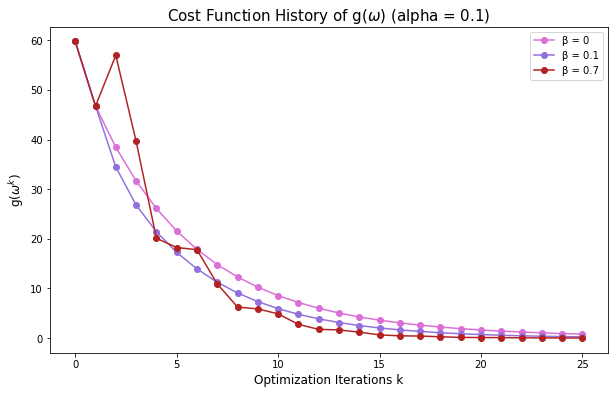

In [7]:
# Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_r1)) 
step_numbers_r2 = np.arange(0, len(cost_history_r2))
step_numbers_r3 = np.arange(0, len(cost_history_r3))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost Function History of g($\omega$) (alpha = 0.1)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, cost_history_r1, color = 'orchid', marker = 'o', label = '\u03B2 = 0')
plt.plot(step_numbers_r2, cost_history_r2, color = 'mediumpurple', marker = 'o', label = '\u03B2 = 0.1')
plt.plot(step_numbers_r3, cost_history_r3, color = 'firebrick', marker = 'o', label = '\u03B2 = 0.7')

plt.legend()
plt.show()

#### Comparison between the three cost history plots
The plot with the highest $\beta$ value demonstrated the highest degree of fluctuation (seen with the spikes), whereas the smaller $\beta$ values had smoother plots. Also, higher $\beta$ values resulted in better minimization based on the final cost values: g($\omega$) = 0.77 <b>($\beta$ = 0)</b>, g($\omega$) = 0.24 <b>($\beta$ = 0.1)</b>, and g($\omega$) = 0.017 <b>($\beta$ = 0.7)</b>.

## Exercise 2 – Slow-crawling Behavior of Gradient Descent 

In [2]:
def norm_gradient_descent(g,alpha_choice,max_its,w,epsilon):
    ''' 

    Since the magnitude of the gradient direction diminishes near stationary points, gradient descent slowly crawls near stationary points which slows minimization.
    Normalized GD defined as norm_gradient_descent is an enhanced version of the first-order local optimization algorithm, gradient descent. 
    The algorithm will ignore the magnitude of the negative gradient through normalization which solves the slow crawling issue.
    Normalization occurs by either normalizing each partial derivative by the magnitude of the entire gradient (Full) or by normalizing partial derivatives with respect to itself (component-wise)
    This algorithm proceeds via full normalization. 

    Parameters
    -------------

    g : callable 
    input function

    alpha_choice : int or str
    steplength parameter/learning rate

    max_its : int
    maximum number of iterations

    w : array 
    initialization

    epsilon : int
    small safety constant


    Return
    -------------

    weight_history : list
    contains all the weights in the algorithm including the initial

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    # compute gradient module using autograd
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # evaluate the gradient, store gradient value and cost function value
        cost_eval,grad_eval = gradient(w)
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
            
        # run full normalization 
        norm_grad_magnitude = np.linalg.norm(grad_eval) + epsilon
        desc_dir = (-grad_eval)/norm_grad_magnitude

        # take gradient descent step
        w = w + alpha*desc_dir

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

In [3]:
def gradient_descent(g,alpha_choice,max_its,w):
    ''' 

    The standard gradient descent algorithm takes the first derivative or gradient of the function.
    Since the negative gradient is always descending, by evaluating this, the algorithm is able to locally find the minimum of a function.

    Parameters
    -------------

    g : callable 
    input function

    alpha_choice : int or str
    steplength parameter/learning rate

    max_its : int
    maximum number of iterations

    w : array 
    initialization


    Return
    -------------

    weight_history : list
    contains all the weights in the algorithm including the initial

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    # compute gradient module using autograd
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
            
        # compute the value of the function and the gradient at wk
        cost_eval,grad_eval = gradient(w) 

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

In [10]:
# Set the parameters for our algorithm 
g = lambda w: (np.tanh(4*w[0] + 4*w[1]) + (max(1,0.4*(w[0]**2)) + 1))
alpha_choice = 0.1; w = np.array([2.,2.]); max_its = 1000; epsilon = 10**(-10)

# Run our algorithm with the defined function to obtain w and cost history for full normalized & standard GD
weight_history_full,cost_history_full = norm_gradient_descent(g,alpha_choice,max_its,w,epsilon)
weight_history_stan,cost_history_stan = gradient_descent(g,alpha_choice,max_its,w)

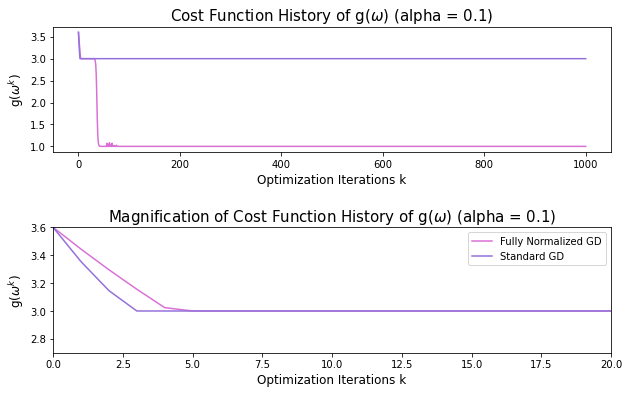

In [11]:
# Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers_full = np.arange(0, len(cost_history_full)) 
step_numbers_stan = np.arange(0, len(cost_history_stan))

# set the size and titles of the plot and the axis
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 6))
plt.subplots_adjust(hspace = 0.6)
ax1.set_title("Cost Function History of g($\omega$) (alpha = 0.1)", fontsize = 15) 
ax1.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(step_numbers_full, cost_history_full, color = 'orchid', label = 'Fully Normalized GD')
ax1.plot(step_numbers_stan, cost_history_stan, color = 'mediumpurple', label = 'Standard GD')

# plot the cost history of all runs
ax2.set_title("Magnification of Cost Function History of g($\omega$) (alpha = 0.1)", fontsize = 15) 
ax2.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(step_numbers_full, cost_history_full, color = 'orchid', label = 'Fully Normalized GD')
ax2.plot(step_numbers_stan, cost_history_stan, color = 'mediumpurple', label = 'Standard GD')
ax2.set_xlim([0,20])
ax2.set_ylim([2.7,3.6])

plt.legend()
plt.show()


#### Comparison between standard GD and fully normalized GD

Based on the above plot, the standard GD minimizes the function faster than the fully normalized GD during the first 5 iterations (demonstrated in the lower graph where the purple plot has a steeper slope than the pink plot). After about 30-50 iterations, the fully normalized gradient descent is able to minimize the function to a lower minimum than the standard GD (demonstrated by the upper graph with the pink plot showing a steep slope whereas the purple plot remains at some plateau). This demonstrates that the standard GD slowly crawls at some saddle point, whereas the fully normalized GD is able to overcome this issue (at k = 1000, g($\omega$) = 3 for standard GD whereas g($\omega$) = 1 for normalized GD). Moreover, there is a bit of fluctuation in fully normalized GD after the second rapid minimization (seen by the small peaks near k = 100). 

## Exercise 3 – Student Debt - Linear Regression Using a Single Newton Step

### 3.1 – Linear Model Algorithm 

In [27]:
# import the dataset
csvname = 'student_debt_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))

# extract input
x = data[:,0]
x.shape = (len(x),1) # generate column vector 

# pad input with ones
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1) # put 1s in front of each x data within column vector to account bias w0

# extract y values from dataset
y = data[:,1]

# Find vector w 
A = np.dot(x_new.T,x_new) # (2 x len(x)) dot (len(x) x 2) --> 2x2
A_Inverse = np.linalg.pinv(A)
print(A_Inverse, "\n The dimension of the matrix you need to perform the Newton step is the 2x2 matrix displayed above")
w1 = np.dot(np.dot(x_new,A_Inverse).T,y)


[[ 1.20973802e+04 -6.02120585e+00]
 [-6.02120585e+00  2.99692943e-03]] 
 The dimension of the matrix you need to perform the Newton step is the 2x2 matrix displayed above


In [4]:
def model(x,w):
    ''' 

    After determining the parameters needed from the Newton step, we will utilize an algorithm that produces a hyperplane.
    The produced hyperplane is a linear model that best fits the regression data (parameters minimize error).

    Parameters
    -------------

    x : vector 
    raw input

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    a.T : vector
    column vector containing computed predictive value

    '''
    a = w[0] + np.dot(x.T,w[1])
    return a.T # returns a column vector 

In [14]:
linear_model = model(x,w1)

### 3.2 – US Student Debt Linear Regression Plot

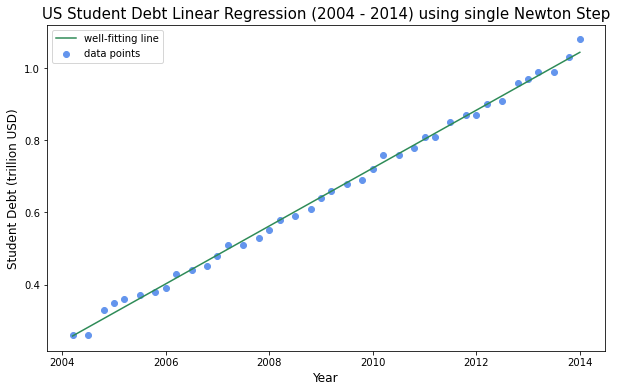

In [15]:
# Plot data points of student debt & year along with line of best fit

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("US Student Debt Linear Regression (2004 - 2014) using single Newton Step", fontsize = 15) 
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Student Debt (trillion USD)', fontsize = 12)
ax.scatter(x, y, color = 'cornflowerblue', label = 'data points') # plot data points
ax.plot(x, linear_model, color = 'seagreen', label = 'well-fitting line') # plot the best fit

plt.legend()
plt.show()

#### Observations of the Linear Regression Plot
Based on the above plot, the data points fall quite linearly as the points are placed near or at the line of best fit. Moreover, it seems that the student debt is increasing linearly every year shown by higher student debts at later years. 

### 3.3 – Model Prediction

In [16]:
# Set the year for our algorithm 
x = np.array(2050)

# Run our algorithm with the defined year
print('If the trend continues, the total student debt in 2015 is predicted to be', '\033[1m' + '$'+ str(model(x,w1)), 'trillion USD')

If the trend continues, the total student debt in 2015 is predicted to be $3.936011965648163 trillion USD


## Exercise 4 – Linear Regression with Optimization

### 4.1 – Data Extraction & Model Creation 

In [17]:
# Import the dataset and extract data
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

# Take the logarithm of x and y
log_x = np.log(x) 
log_y = np.log(y)

In [18]:
# Implement gradient descent
def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
            
        # compute the value of the function and the gradient at wk
        cost_eval,grad_eval = gradient(w) 

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

In [5]:
# Linear Model
def model(x,w):
    ''' 

    We will be utilizing an algorithm defined as model that demonstrates Kleiber's Law.
    The algorithm relates the body mass (x) with the metabolic rate (y) of a given animal, resembling a linear model.

    Parameters
    -------------

    x : vector 
    raw input

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    log_yp :scalar
    evaluated Kleiber's Law returning log y value 

    '''
    log_yp = w[0] + np.dot(x,w[1])
    return log_yp




# Least Squares Cost Function for Linear Regression 
def least_squares(w):
    ''' 

    To find the parameters of our hyperplane, we will form a cost function, defined as least_squares, that measures how well a linear model fits our regression data.
    Given a particular choice of parameters, this algorithm will compute the total squared error between the hyperplane and data to find the parameters that minimize this error.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    total squared error :scalar
    error between hyperplane and data 

    '''
    cost = np.sum((model(log_x,w) - log_y)**2)
    return cost/float(log_y.size)

### 4.2 – Using Gradient Descent to Optimize Linear Regression 

In [20]:
# Set the parameters for our algorithm 
g = least_squares
alpha_choice = 0.01; w = np.random.random(2); max_its = 1000;

# Run our algorithm with the defined function to obtain w and cost history 
kleibers_weight_history, kleibers_cost_history = gradient_descent(g,alpha_choice,max_its,w)

### 4.3 – Kleiber's Law Data with Linear Model & Cost History Plots

In [21]:
# Obtain our plotting data
min_weight = kleibers_weight_history[-1] # obtain our optimal weight for our linear fit model
Linear_Fit = model(log_x,min_weight)
step_numbers = np.arange(0, len(kleibers_cost_history))

#### Fitted Linear Model Plot

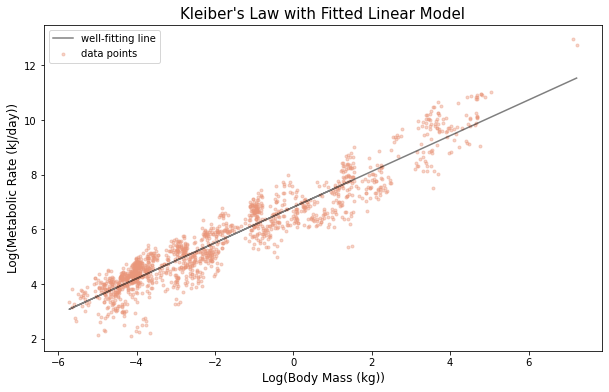

In [22]:
# Plot data points of student debt & year along with line of best fit

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Kleiber's Law with Fitted Linear Model", fontsize = 15) 
ax.set_xlabel('Log(Body Mass (kg))', fontsize = 12) 
ax.set_ylabel('Log(Metabolic Rate (kJ/day))', fontsize = 12)
ax.scatter(log_x, log_y, color = 'darksalmon', marker = '.', alpha = 0.4, label = 'data points') # plot data points
ax.plot(log_x[0], Linear_Fit[0], color = 'black', alpha = 0.5, label = 'well-fitting line') # plot the best fit

plt.legend()
plt.show()

#### Observations of Kleiber's Law Plot 
Based on the above plot, the data points do not fall perfectly linear as the points fluctuate around the line of best fit. However, it seems that the metabolic rate increases with increasing body mass. 

#### Cost History Plot

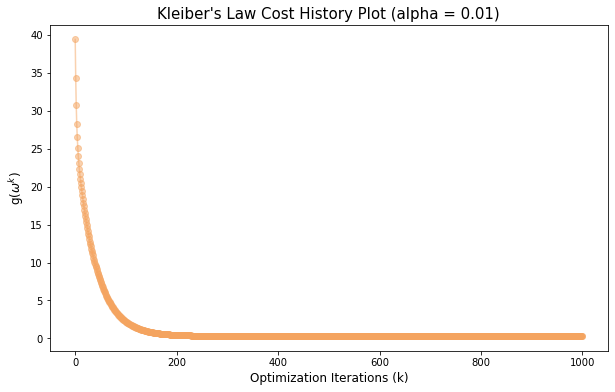

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Kleiber's Law Cost History Plot (alpha = 0.01)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations (k)', fontsize = 12) 
ax.set_ylabel('g($\omega^k$)', fontsize = 12)
ax.plot(step_numbers, kleibers_cost_history, marker = 'o', color = 'sandybrown', alpha = 0.5) 

plt.show()

#### Observations of the Kleiber's Law Cost History Plot 
The algorithm started at a starting cost of g($\omega$) > 30 and then rapidly minimized within the first 200 iterations to g($\omega$) < 1. After 200 iterations, it seems that the algorithm has effectively minimized the cost and thus the changes are minimal at this range where g($\omega$) = 0.3 at k = 1000.  

### 4.4 – Model Prediction

In [24]:
# Set the body mass for our linear model and take the logarithm 
x0 = 10
log_x0 = np.log(x0)

predicted = model(log_x0,min_weight)
metabolic_rate = np.exp(predicted) # solve for metabolic rate in KJ/day
cal = (metabolic_rate*1000)/4.18 # convert to Joules --> calories
print("Based on Kleiber's law, an animal weighing 10 kg requires", '\033[1m' + str(cal) + '\033[0m', 'calories per day')

Based on Kleiber's law, an animal weighing 10 kg requires 980010.6960117277 calories per day
